# Ensembling

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("bank.csv")

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


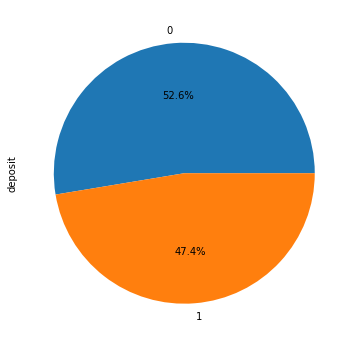

In [13]:
plt.figure(figsize=(6,6))
df["deposit"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Naive Aggregation

In [16]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")

In [17]:
model_list = [('lr',lr),('dt1',dt1),('dt2',dt2)]

In [18]:
from sklearn.ensemble import VotingClassifier

### 1) Hard voting

In [19]:
vc1 =  VotingClassifier(estimators=model_list)

In [20]:
vc1.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dt1', Decisio...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [21]:
y_pred = vc1.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

   micro avg       0.82      0.82      0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



### 2) Soft voting

In [23]:
vc2 =  VotingClassifier(estimators=model_list,voting="soft")

In [24]:
vc2.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dt1', Decisio...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [25]:
y_pred = vc2.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1760
           1       0.81      0.82      0.82      1589

   micro avg       0.83      0.83      0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



## Bootstrap Aggregation

In [27]:
from sklearn.ensemble import BaggingClassifier

### 1) Bagging

In [28]:
bg = BaggingClassifier(LogisticRegression(), n_estimators=10, max_samples=100,random_state=1)

In [29]:
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [30]:
y_pred = bg.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1760
           1       0.80      0.74      0.77      1589

   micro avg       0.79      0.79      0.79      3349
   macro avg       0.79      0.78      0.78      3349
weighted avg       0.79      0.79      0.79      3349



### 2) Pasting

In [32]:
bg2 = BaggingClassifier(LogisticRegression(), max_samples=100,random_state=1,bootstrap=False)

In [33]:
bg2.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [34]:
y_pred = bg2.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1760
           1       0.80      0.74      0.77      1589

   micro avg       0.79      0.79      0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



## Random forest 

In [36]:
# BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, max_samples=100,random_state=1)

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)

In [39]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [40]:
y_pred = rf.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1760
           1       0.82      0.83      0.82      1589

   micro avg       0.83      0.83      0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



## Stacking

In [42]:
# conda install mlxtend --channel conda-forge

In [43]:
from mlxtend.classifier import StackingClassifier

In [48]:
lr = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion="entropy")
model_list = [lr,dt1,dt2]

In [49]:
meta_lr = LogisticRegression()

In [50]:
stack = StackingClassifier(classifiers=model_list, meta_classifier=meta_lr)

In [51]:
stack.fit(X_train,y_train)

StackingClassifier(average_probas=False,
          classifiers=[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), DecisionTreeClassifier...       min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')],
          drop_last_proba=False,
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)

In [52]:
y_pred = stack.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1760
           1       0.75      0.88      0.81      1589

   micro avg       0.80      0.80      0.80      3349
   macro avg       0.81      0.80      0.80      3349
weighted avg       0.81      0.80      0.80      3349

